# Healthcare dateset visualizations

In [9]:
# Read the dataset with the specified delimiter
df <- read.csv("healthcare_dataset2.csv", sep=";")

# Bar chart

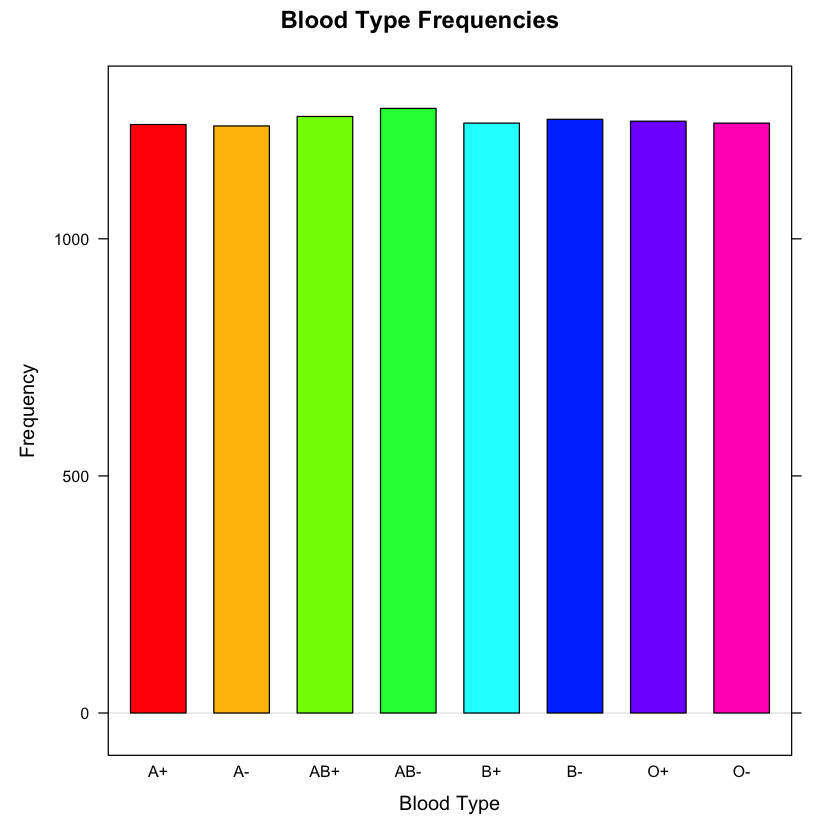

In [10]:
# Load the lattice library
library(lattice)

# Create a table of blood type frequencies
blood_type_counts <- table(df$Blood.Type)

colors <- rainbow(length(blood_type_counts))

# Create a vertical bar chart using barchart function from lattice
barchart(blood_type_counts, 
         main="Blood Type Frequencies", 
         ylab="Frequency", 
         xlab="Blood Type", 
         col=colors,  # Assign different colors to each bar
         horizontal=FALSE,  # Vertical bar chart
         auto.key=list(space="right", title="Blood Type"))  # Add legend


# Histogram

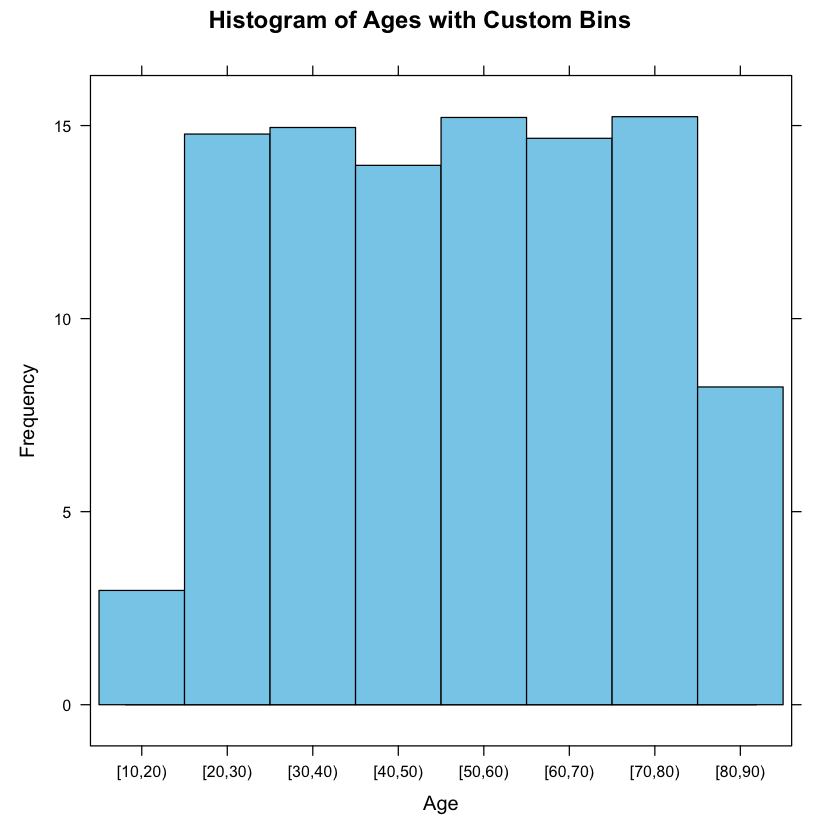

In [11]:
# Load the lattice library
library(lattice)
# Define the age bins
age_bins <- cut(df$Age, breaks = seq(10, 100, by = 10), right = FALSE)
# Create a histogram of ages with custom bins
histogram(~age_bins, 
          data = df, 
          main = "Histogram of Ages with Custom Bins", 
          xlab = "Age",
          ylab = "Frequency",
          col = "skyblue",  # Set color of bars
          auto.key = list(space = "right", title = "Age Bins"))  # Add legend

# Box plot

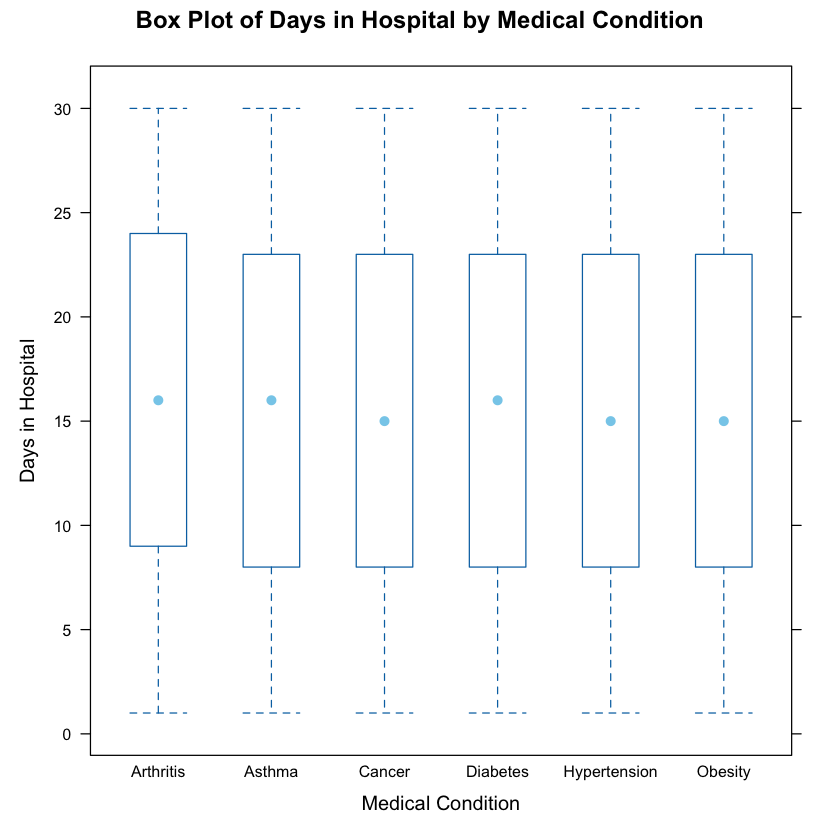

In [12]:
# Load the lattice library
library(lattice)

# Create a box plot of days in hospital by medical condition
bwplot(Days.in.Hospital ~ Medical.Condition, 
       data = df, 
       main = "Box Plot of Days in Hospital by Medical Condition", 
       xlab = "Medical Condition",
       ylab = "Days in Hospital",
       col = "skyblue",  # Set color of boxes
       horizontal = FALSE)  # Plot vertical boxes


# Penguin dataset visualizations

# Scatter plot matrix

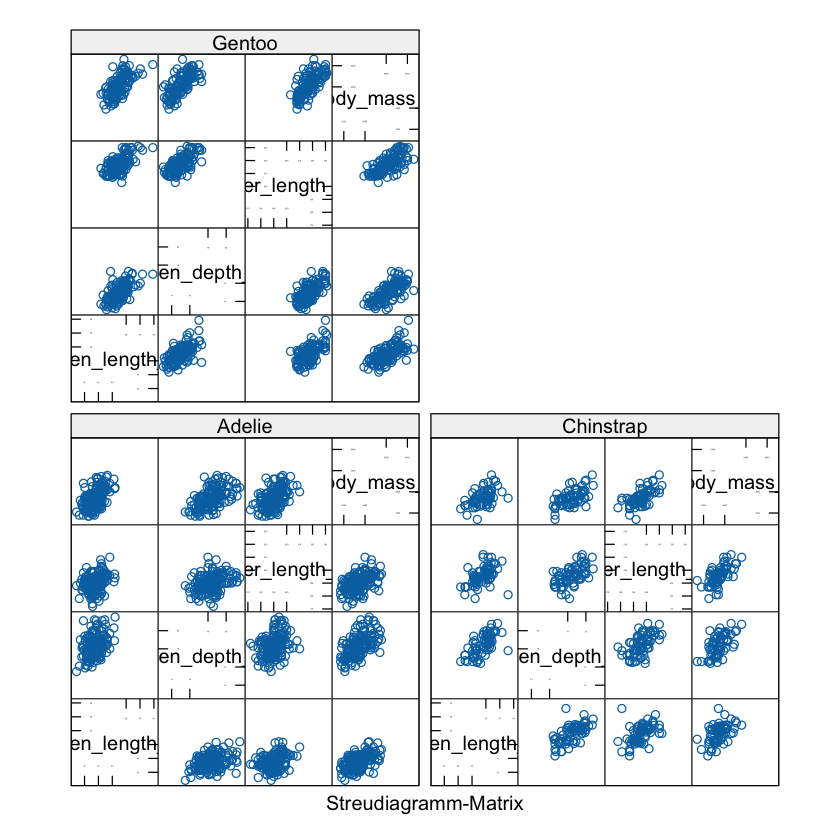

In [13]:
# Load necessary library
library(lattice)

# Load the data
df <- read.csv("penguins.csv")

# Define category orders
df$species <- factor(df$species, levels = c("Adelie", "Chinstrap", "Gentoo"))

# Set graphical parameters to make the plots bigger
trellis.par.set(theme = list(axis.text = list(cex = 0.1), strip.text = list(cex = 0.1)))

# Create scatterplot matrix
splom_obj <- splom(~df[, c("culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g")] | df$species,
      auto.key = list(columns = 3),
      scales = list(x = list(relation="free"), y = list(relation="free")))

# Print the scatterplot matrix
print(splom_obj)

# Heatmap

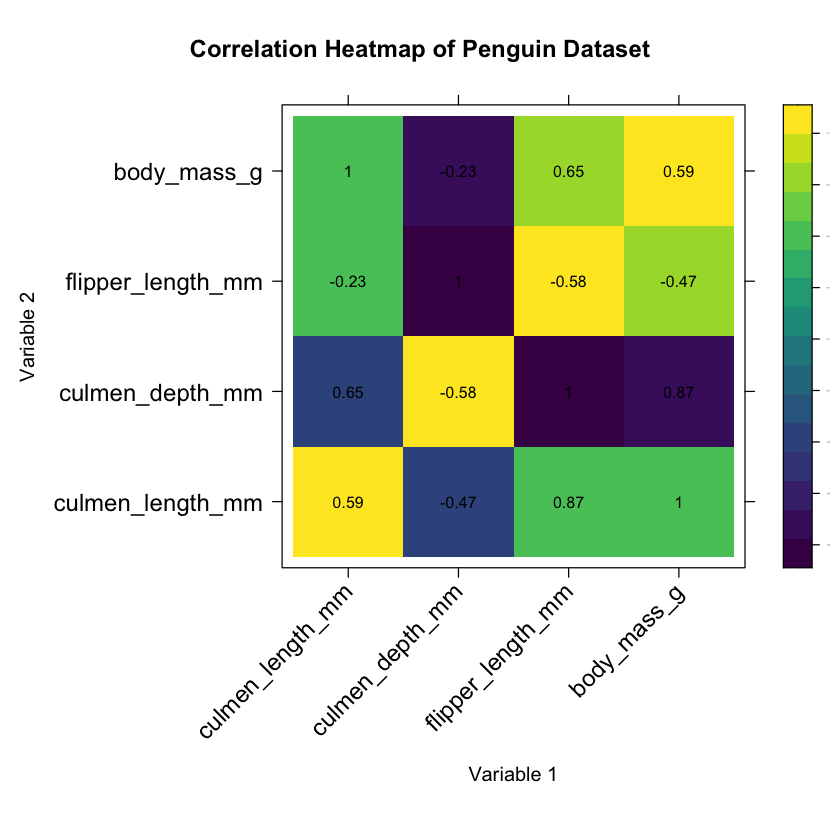

In [14]:
# Load required libraries
library(lattice)
library(viridis)
library(tidyr)
library(dplyr)

# Load the penguins dataset
penguins <- read.csv('penguins.csv')

# Remove missing values
penguins <- na.omit(penguins)

# Select columns 3 to 6 for heatmap
heatmap_data <- penguins[, 3:6]

# Calculate correlation matrix
correlation_matrix <- cor(heatmap_data)

# Convert the correlation matrix to a dataframe
correlation_df <- as.data.frame(correlation_matrix)

# Plot heatmap using lattice with correlation values
levelplot(correlation_matrix,
          col.regions = viridis(100),
          scales = list(x = list(rot = 45, cex = 1.2), y = list(rot = 0, cex = 1.2)),
          xlab = "Variable 1", ylab = "Variable 2",
          main = "Correlation Heatmap of Penguin Dataset",
          panel = function(...) {
            panel.levelplot(...)
            panel.text(x = rep(1:ncol(correlation_matrix), each = nrow(correlation_matrix)),
                       y = rep(nrow(correlation_matrix):1, times = ncol(correlation_matrix)),
                       labels = round(correlation_matrix, 2), cex = 0.8, col = "black")
          })

